# Section 1 - Import Required Modules

In [125]:
import nltk
import re
import sys
import pickle
import nltk
import sklearn
import pandas
import numpy
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn import model_selection
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [126]:
import plotly
plotly.tools.set_credentials_file(username='psshri', api_key='3OBZ6Crd67DnXjWzKICb')
import plotly.plotly as py
import plotly.graph_objs as go

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Section 2 - Load the dataset

In [128]:
with open("apple-computers.txt", "r") as f:
    text = f.read()
sentences_company = re.split(r' *[\.\?!][\'"\)\]]* *', text) ## splits the text file 'sentence-wise'

with open("apple-fruit.txt", "r") as f:
    text = f.read()
sentences_fruit = re.split(r' *[\.\?!][\'"\)\]]* *', text)  ## splits the text file 'sentence-wise'

In [129]:
## this piece of code does the following task for both the text files
## 1) creates an empty list
## 2) add those sentences to the list whole length is greater than 5

sentences_company_2 = []
for i in range(len(sentences_company)):
    if(len(sentences_company[i])>5):
        sentences_company_2.append(sentences_company[i])
        

sentences_fruit_2 = []

for i in range(len(sentences_fruit)):
    if(len(sentences_fruit[i])>5):
        sentences_fruit_2.append(sentences_fruit[i])

In [130]:
len(sentences_company_2), len(sentences_fruit_2)

(533, 273)

In [131]:
## this piece of code creates a dataframe object for the training text files

df_company = pd.DataFrame(sentences_company_2, columns=['message'])
df_company['label'] = 'computer-company'
df_company.head()

,message,label
0,Apple Inc,computer-company
1,"\nFrom Wikipedia, the free encyclopedia\nThis ...",computer-company
2,"For other companies named ""Apple"", see Apple (...",computer-company
3,\nPage semi-protected\nCoordinates: 37,computer-company
4,33182°N 122,computer-company


In [132]:
## this piece of code creates a dataframe object for the training text files

df_fruit = pd.DataFrame(sentences_fruit_2, columns=['message'])
df_fruit['label'] = 'fruit'
df_fruit.head()

,message,label
0,This article is about the fruit,fruit
1,"For the technology company, see Apple Inc",fruit
2,"For other uses, see Apple (disambiguation)",fruit
3,"\n""Apple tree"" redirects here",fruit
4,"For other uses, see Apple tree (disambiguation)",fruit


In [133]:
## combine the above two dataframe

df_final = pd.concat([df_company, df_fruit])
df_final = df_final.reset_index(drop=True)
print(len(df_final))
df_final.head()

806


,message,label
0,Apple Inc,computer-company
1,"\nFrom Wikipedia, the free encyclopedia\nThis ...",computer-company
2,"For other companies named ""Apple"", see Apple (...",computer-company
3,\nPage semi-protected\nCoordinates: 37,computer-company
4,33182°N 122,computer-company


In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 2 columns):
message    806 non-null object
label      806 non-null object
dtypes: object(2)
memory usage: 12.7+ KB


In [135]:
## check for any null values
df_final.isnull().values.any()

False

# Section 3 - Data Preprocessing

clean the text data

In [136]:
# Replace money symbols with 'moneysymb'
df_final['message'] = df_final['message'].str.replace(r'£|\$', 'moneysymb') 

# Replace 10 digit phone numbers with 'phonenumber'
df_final['message'] = df_final['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')

# Replace numbers with 'numbr'
df_final['message'] = df_final['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

# Remove punctuation
df_final['message'] = df_final['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
df_final['message'] = df_final['message'].str.replace(r'\s+', ' ') 

# Remove leading and trailing whitespace
df_final['message'] = df_final['message'].str.replace(r'^\s+|\s+?$', '') 

# change words to lower case - Hello, HELLO, hello are all the same word
df_final['message'] = df_final['message'].str.lower() 

In [137]:
# remove stop words from text messages

stop_words = set(stopwords.words('english'))
df_final['message'] = df_final['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [138]:
# Remove word stems using a Porter stemmer

ps = nltk.PorterStemmer()
df_final['message'] = df_final['message'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [139]:
# convert class labels to binary values, 0 = computer-company and 1 = fruit

encoder = LabelEncoder()
df_final['label'] = encoder.fit_transform(df_final['label'])

In [140]:
## Shuffle the dataset

from sklearn.utils import shuffle
df_final = shuffle(df_final, random_state=0)

In [141]:
df_final.head(3)

,message,label
8,numbr number locat numbr retail store may numb...,0
258,numbr initi sole us provid numbrg wireless acc...,0
172,ipad run touch base oper system iphon use mani...,0


# Section 4 - Word Cloud

Size of word is directly proportional to its frequency of appearance in the document

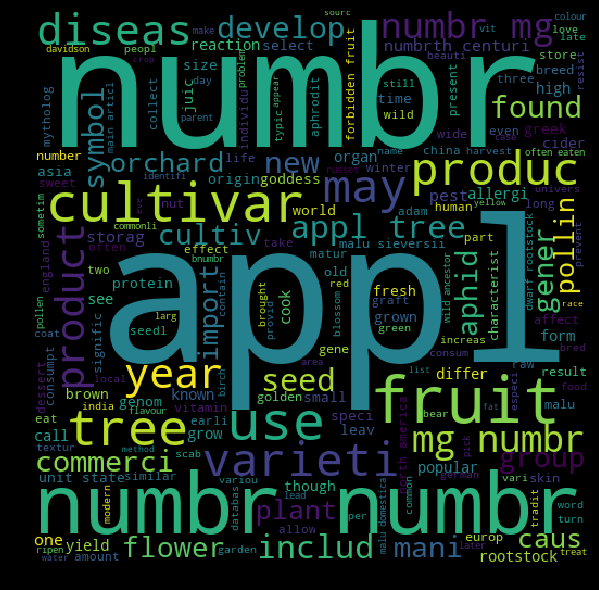

In [142]:
fruit_words = ' '.join(list(df_final[df_final['label'] == 1]['message']))
fruit_wc = WordCloud(width = 512,height = 512).generate(fruit_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(fruit_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

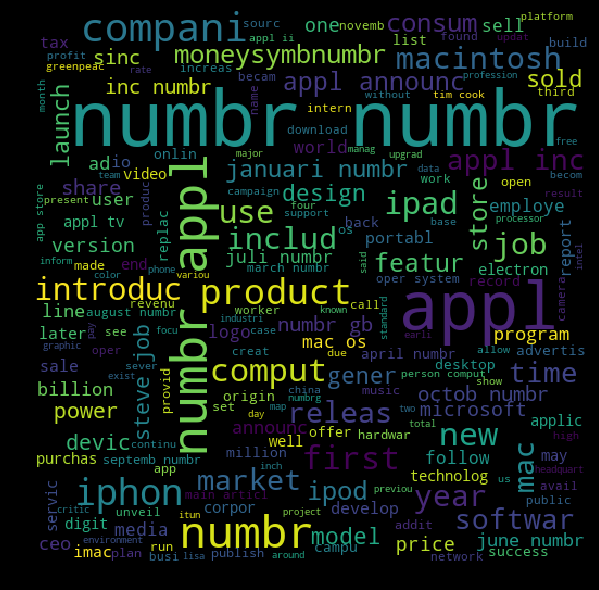

In [143]:
company_words = ' '.join(list(df_final[df_final['label'] == 0]['message']))
company_wc = WordCloud(width = 512,height = 512).generate(company_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(company_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Section 5 - Feature generation using Bag-of-Words

In [144]:
cv_1 = CountVectorizer()
text_counts_1 = cv_1.fit_transform(df_final['message'])

In [145]:
text_counts_1.shape

(806, 2676)

There are a total of 2676 words

# Section 6 - Model Evaluation - Bag of Words

In [146]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(text_counts_1, df_final['label'], test_size=0.25, random_state=0)

In [147]:
## we are going to train 7 most common classification models
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

accuracy_bow = [] ## stores accuracy for BoW models, will be required later for visualization

for name, model in models:
    model = model.fit(X_train_1, y_train_1)
    predicted = model.predict(X_test_1)
    acc = accuracy_score(y_test_1, predicted)*100
    accuracy_bow.append(acc)
    print("{} Accuracy: {}".format(name, acc))

K Nearest Neighbors Accuracy: 50.495049505
Decision Tree Accuracy: 79.2079207921
Random Forest Accuracy: 86.1386138614
Logistic Regression Accuracy: 91.5841584158
SGD Classifier Accuracy: 92.0792079208
Naive Bayes Accuracy: 95.0495049505
SVM Linear Accuracy: 90.099009901


# Section 7 - Feature Generation using TF-IDF

In [148]:
tf_1= TfidfVectorizer()
text_tf_1= tf_1.fit_transform(df_final['message'])

# Section 8 - Model Evaluation - TF-IDF

In [149]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(text_tf_1, df_final['label'], test_size=0.25, random_state=0)

In [150]:
accuracy_tfidf = []  ## stores accuracy for tf-idf model, required later for visualization

for name, model in models:
    model = model.fit(X_train_2, y_train_2)
    predicted = model.predict(X_test_2)
    acc = accuracy_score(y_test_2, predicted)*100
    accuracy_tfidf.append(acc)
    print("{} Accuracy: {}".format(name, acc))

K Nearest Neighbors Accuracy: 88.1188118812
Decision Tree Accuracy: 81.1881188119
Random Forest Accuracy: 81.1881188119
Logistic Regression Accuracy: 83.1683168317
SGD Classifier Accuracy: 94.5544554455
Naive Bayes Accuracy: 89.603960396
SVM Linear Accuracy: 92.0792079208


# Section 9 - Comparing BOW and TF-IDF

In [151]:
trace1 = go.Bar(
    x=names,
    y=accuracy_bow,
    name='Bag of Words'
)
trace2 = go.Bar(
    x=names,
    y=accuracy_tfidf,
    name='TF-IDF'
)

data_1 = [trace1, trace2]
layout_1 = go.Layout(barmode='group')

fig_1 = go.Figure(data=data_1, layout=layout_1)
py.iplot(fig_1, filename='grouped-bar')

# Section 10 - To find out optimal number of features and best model (BOW)

In [152]:
number_of_features = [] ## this list is used to store the possible number of features
knn = []
dt = []
rf = []
lr = []
sgd = []
nb = []
svm = []


## this dictionary will map list with model name inside the for loop
mapping = {
    "K Nearest Neighbors":knn,
    "Decision Tree":dt,
    "Random Forest":rf,
    "Logistic Regression":lr,
    "SGD Classifier":sgd,
    "Naive Bayes":nb,
    "SVM Linear":svm
}

## ths for loop will generate the probabale number of features
for i in range(10,27):
    number_of_features.append(i*100)

In [153]:
for i in number_of_features:
    cv_2 = CountVectorizer(max_features = i) ## max_features argument will use only i most common features
    text_counts_2= cv_2.fit_transform(df_final['message'])
  
    X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(text_counts_2, df_final['label'], test_size=0.25, random_state=0)
  
    for name, model in models:
        model = model.fit(X_train_3, y_train_3)
        predicted = model.predict(X_test_3)
        acc = accuracy_score(y_test_3, predicted)*100
        mapping[name].append(acc) ## using the dictionary, this will map the accuracy to the correct list

Plotting Accuracy of each model vs No of features

In [154]:
trace_3 = go.Scatter(
    x = number_of_features,
    y = knn,
    mode = 'lines',
    name = 'KNN'
)
trace_4 = go.Scatter(
    x = number_of_features,
    y = dt,
    mode = 'lines',
    name = 'Decision Trees'
)
trace_5 = go.Scatter(
    x = number_of_features,
    y = rf,
    mode = 'lines',
    name = 'Random Forest'
)
trace_6 = go.Scatter(
    x = number_of_features,
    y = lr,
    mode = 'lines',
    name = 'Logistic Regression'
)
trace_7 = go.Scatter(
    x = number_of_features,
    y = sgd,
    mode = 'lines',
    name = 'SGD'
)
trace_8 = go.Scatter(
    x = number_of_features,
    y = nb,
    mode = 'lines',
    name = 'Naive Bayes'
)
trace_9 = go.Scatter(
    x = number_of_features,
    y = svm,
    mode = 'lines',
    name = 'SVM'
)

data_2 = [trace_4, trace_5, trace_6, trace_7, trace_8, trace_9]

layout_2 = dict(title = 'Accuracy vs No of Features BoW',
              xaxis = dict(title = 'No of Features'),
              yaxis = dict(title = 'Accuracy'),
              )

fig_2 = dict(data=data_2, layout=layout_2)
py.iplot(fig_2, filename='styled-line')

In [155]:
layout_2_a = dict(title = 'Accuracy vs No of Features BoW for KNN',
              xaxis = dict(title = 'No of Features'),
              yaxis = dict(title = 'Accuracy'),
              )

fig_3 = dict(data=[trace_3], layout=layout_2_a)
py.iplot(fig_3, filename='styled-line')

# Section 11 - To find out optimal number of features and best model (TF-IDF)

In [156]:
number_of_features_tf = [] ## this list is used to store the possible number of features, this is same as number_of_features
knn_tf = []
dt_tf = []
rf_tf = []
lr_tf = []
sgd_tf = []
nb_tf = []
svm_tf = []

mapping_tf = {
    "K Nearest Neighbors":knn_tf,
    "Decision Tree":dt_tf,
    "Random Forest":rf_tf,
    "Logistic Regression":lr_tf,
    "SGD Classifier":sgd_tf,
    "Naive Bayes":nb_tf,
    "SVM Linear":svm_tf
}

## ths for loop will generate the probabale number of features
for i in range(10,27):
    number_of_features_tf.append(i*100)

In [157]:
for i in number_of_features_tf:
    tf_2 =TfidfVectorizer(max_features=i) ## max_features argument will use only i most common features
    text_tf_2 = tf_2.fit_transform(df_final['message'])
  
    X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(text_tf_2, df_final['label'], test_size=0.25, random_state=0)
  
    for name, model in models:
        model = model.fit(X_train_4, y_train_4)
        predicted = model.predict(X_test_4)
        acc = accuracy_score(y_test_4, predicted)*100
        mapping_tf[name].append(acc) ## using the dictionary, this will map the accuracy to the correct list

Plotting Accuracy of each model vs No of features

In [158]:
trace_10 = go.Scatter(
    x = number_of_features,
    y = knn_tf,
    mode = 'lines',
    name = 'KNN'
)
trace_11 = go.Scatter(
    x = number_of_features,
    y = dt_tf,
    mode = 'lines',
    name = 'Decision Trees'
)
trace_12 = go.Scatter(
    x = number_of_features,
    y = rf_tf,
    mode = 'lines',
    name = 'Random Forest'
)
trace_13 = go.Scatter(
    x = number_of_features,
    y = lr_tf,
    mode = 'lines',
    name = 'Logistic Regression'
)
trace_14 = go.Scatter(
    x = number_of_features,
    y = sgd_tf,
    mode = 'lines',
    name = 'SGD'
)
trace_15 = go.Scatter(
    x = number_of_features,
    y = nb_tf,
    mode = 'lines',
    name = 'Naive Bayes'
)
trace_16 = go.Scatter(
    x = number_of_features,
    y = svm_tf,
    mode = 'lines',
    name = 'SVM'
)

data_3 = [trace_11, trace_12, trace_13, trace_14, trace_15, trace_16]

layout_3 = dict(title = 'Accuracy vs No of Features TF-IDF',
              xaxis = dict(title = 'No of Features'),
              yaxis = dict(title = 'Accuracy'),
              )

fig_4 = dict(data=data_3, layout=layout_3)
py.iplot(fig_4, filename='styled-line')

In [159]:
layout_3_a = dict(title = 'Accuracy vs No of Features TF-IDF for KNN',
              xaxis = dict(title = 'No of Features'),
              yaxis = dict(title = 'Accuracy'),
              )

fig_5 = dict(data=[trace_10], layout=layout_3_a)
py.iplot(fig_5, filename='styled-line')

# Section 12 - Variability in accuracy

In [160]:
## this function will return the range of a list, ie, difference between the maximum and minimum value
def variability(alist):
    size = len(alist)
    max_ = alist[0]
    min_ = alist[0]
  
    for i in range(size):
        if(max_<alist[i]):
            max_ = alist[i]
        if(min_>alist[i]):
            min_ = alist[i]
    return max_ - min_

In [161]:
## variability for BoW

print("Variability of KNN in BoW model: {}".format(variability(knn)))
print("Variability of DT in BoW model: {}".format(variability(dt)))
print("Variability of RF in BoW model: {}".format(variability(rf)))
print("Variability of LR in BoW model: {}".format(variability(lr)))
print("Variability of SGD in BoW model: {}".format(variability(sgd)))
print("Variability of NB in BoW model: {}".format(variability(nb)))
print("Variability of SVM in BoW model: {}".format(variability(svm)))

Variability of KNN in BoW model: 7.42574257426
Variability of DT in BoW model: 5.94059405941
Variability of RF in BoW model: 8.91089108911
Variability of LR in BoW model: 0.495049504951
Variability of SGD in BoW model: 5.44554455446
Variability of NB in BoW model: 0.990099009901
Variability of SVM in BoW model: 1.48514851485


In [162]:
## variability for TF-IDF

print("Variability of KNN in TF-IDF model: {}".format(variability(knn_tf)))
print("Variability of DT in TF-IDF model: {}".format(variability(dt_tf)))
print("Variability of RF in TF-IDF model: {}".format(variability(rf_tf)))
print("Variability of LR in TF-IDF model: {}".format(variability(lr_tf)))
print("Variability of SGD in TF-IDF model: {}".format(variability(sgd_tf)))
print("Variability of NB in TF-IDF model: {}".format(variability(nb_tf)))
print("Variability of SVM in TF-IDF model: {}".format(variability(svm_tf)))

Variability of KNN in TF-IDF model: 2.9702970297
Variability of DT in TF-IDF model: 6.43564356436
Variability of RF in TF-IDF model: 5.94059405941
Variability of LR in TF-IDF model: 1.9801980198
Variability of SGD in TF-IDF model: 1.9801980198
Variability of NB in TF-IDF model: 2.9702970297
Variability of SVM in TF-IDF model: 0.49504950495


SVM with TF-IDF seems to the best fit

# Section 13 - Final Model - NB with BoW with all features

In [163]:
cv_3 = CountVectorizer()
text_counts_3 = cv_3.fit_transform(df_final['message'])

In [164]:
cv_final_ = open("cv_final.pkl","wb")
pickle.dump(cv_3 , cv_final_, protocol=2)
cv_final_.close()

In [165]:
model_final = MultinomialNB()
model_final = model_final.fit(text_counts_3, df_final['label'])

In [166]:
NB_ = open("NB_model_final.pkl","wb")
pickle.dump(model_final ,NB_, protocol=2)
NB_.close()

In [167]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(text_counts_3, df_final['label'], test_size=0.25, random_state=0)
model_final_ = model_final.fit(X_train_5, y_train_5)
prediction_final_ = model_final_.predict(X_test_5)

# print a confusion matrix and a classification report
print(classification_report(y_test_5 , prediction_final_))

pd.DataFrame(
    confusion_matrix(y_test_5, prediction_final_),
    index = [['actual', 'actual'], ['computer-company', 'fruit']],
    columns = [['predicted', 'predicted'], ['computer-company', 'fruit']])

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       134
           1       0.97      0.88      0.92        68

   micro avg       0.95      0.95      0.95       202
   macro avg       0.96      0.93      0.94       202
weighted avg       0.95      0.95      0.95       202



predicted      
                        computer-company fruit
actual computer-company              132     2
       fruit                           8    60

# Section 14 - TEST

In [168]:
def test(filename):
    
    with open(filename, "r") as f:
        text = f.read()
    sentences_test = re.split(r' *[\.\?!][\'"\)\]]* *', text)
  
    df_test = pd.DataFrame(sentences_test, columns=['message'])
  
    df_test['message'] = df_test['message'].str.replace(r'£|\$', 'moneysymb') # Replace money symbols with 'moneysymb'
    df_test['message'] = df_test['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumbr')# Replace 10 digit phone numbers with 'phonenumber'
    df_test['message'] = df_test['message'].str.replace(r'\d+(\.\d+)?', 'numbr') # Replace numbers with 'numbr'
    df_test['message'] = df_test['message'].str.replace(r'[^\w\d\s]', ' ') # Remove punctuation
    df_test['message'] = df_test['message'].str.replace(r'\s+', ' ') # Replace whitespace between terms with a single space
    df_test['message'] = df_test['message'].str.replace(r'^\s+|\s+?$', '') # Remove leading and trailing whitespace
    df_test['message'] = df_test['message'].str.lower() # change words to lower case - Hello, HELLO, hello are all the same word
  
    stop_words = set(stopwords.words('english'))
    df_test['message'] = df_test['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

    ps = nltk.PorterStemmer()
    df_test['message'] = df_test['message'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

    df_test['message'] = df_test['message'][df_test['message'].map(len)>0]
    df_test = df_test.dropna()
  
    test_tf= cv_3.transform(df_test['message'])
    prediction_final = model_final.predict(test_tf)
  
    for i in prediction_final:
        if(i==0):
            print('computer-company')
        else:
            print('fruit')

In [169]:
test('test.txt')

fruit
computer-company
computer-company
fruit
fruit
